# BCI3333 Machine Learning Application - Final Assessment

# Chaw Jo Chia CB20130

## Spotify Hit Predictor: dataset-of-10s.csv (https://www.kaggle.com/datasets/theoverman/the-spotify-hit-predictor-dataset?select=dataset-of-10s.csv)

## SVM & Random Forest Classifier

In [1]:
# Support Vector Machine Classification
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import dataset
dataset = pd.read_csv('dataset-of-10s.csv')
print(dataset.head(), '\n\n')
print(dataset.shape, '\n\n')
print(dataset.info(), '\n\n')

                                 track                          artist  \
0                          Wild Things                    Alessia Cara   
1                            Surfboard                       Esquivel!   
2                         Love Someone                    Lukas Graham   
3  Music To My Ears (feat. Tory Lanez)                   Keys N Krates   
4        Juju On That Beat (TZ Anthem)  Zay Hilfigerrr & Zayion McCall   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:2ZyuwVvV6Z3XJaXIFbspeE         0.741   0.626    1    -4.826   
1  spotify:track:61APOtq25SCMuK0V5w2Kgp         0.447   0.247    5   -14.661   
2  spotify:track:2JqnpexlO9dmvjUMCaLCLJ         0.550   0.415    9    -6.557   
3  spotify:track:0cjfLhk8WJ3etPTCseKXtk         0.502   0.648    0    -5.698   
4  spotify:track:1lItf5ZXJc1by9SbPeljFd         0.807   0.887    1    -3.892   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \

In [2]:
# Check outliers
print(dataset.describe(), '\n\n')

       danceability       energy          key     loudness         mode  \
count   6398.000000  6398.000000  6398.000000  6398.000000  6398.000000   
mean       0.568163     0.667756     5.283526    -7.589796     0.645514   
std        0.191103     0.240721     3.606216     5.234592     0.478395   
min        0.062200     0.000251     0.000000   -46.655000     0.000000   
25%        0.447000     0.533000     2.000000    -8.425000     0.000000   
50%        0.588000     0.712500     5.000000    -6.096500     1.000000   
75%        0.710000     0.857000     8.000000    -4.601250     1.000000   
max        0.981000     0.999000    11.000000    -0.149000     1.000000   

       speechiness  acousticness  instrumentalness     liveness      valence  \
count  6398.000000   6398.000000       6398.000000  6398.000000  6398.000000   
mean      0.098018      0.216928          0.165293     0.196700     0.443734   
std       0.097224      0.296835          0.318736     0.166148     0.245776   
min 

In [3]:
# Identify missing values
print(dataset.isnull().sum())
dataset = dataset.dropna()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64


In [4]:
# Define the mapping of numerical data to categorical data
mapping = {0: 'flop', 1: 'hit'}

# Replace the numerical data to categorical data
dataset['target'] = dataset['target'].replace(mapping)
print(dataset.head())

                                 track                          artist  \
0                          Wild Things                    Alessia Cara   
1                            Surfboard                       Esquivel!   
2                         Love Someone                    Lukas Graham   
3  Music To My Ears (feat. Tory Lanez)                   Keys N Krates   
4        Juju On That Beat (TZ Anthem)  Zay Hilfigerrr & Zayion McCall   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:2ZyuwVvV6Z3XJaXIFbspeE         0.741   0.626    1    -4.826   
1  spotify:track:61APOtq25SCMuK0V5w2Kgp         0.447   0.247    5   -14.661   
2  spotify:track:2JqnpexlO9dmvjUMCaLCLJ         0.550   0.415    9    -6.557   
3  spotify:track:0cjfLhk8WJ3etPTCseKXtk         0.502   0.648    0    -5.698   
4  spotify:track:1lItf5ZXJc1by9SbPeljFd         0.807   0.887    1    -3.892   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \

In [5]:
# Convert back the categorical data to numerical data - mode
# Define the mapping of categorical data to numerical data
mapping = {'flop': 0, 'hit': 1}

# Replace the categorical data to numerical data
dataset['target'] = dataset['target'].replace(mapping)
print(dataset.head())

                                 track                          artist  \
0                          Wild Things                    Alessia Cara   
1                            Surfboard                       Esquivel!   
2                         Love Someone                    Lukas Graham   
3  Music To My Ears (feat. Tory Lanez)                   Keys N Krates   
4        Juju On That Beat (TZ Anthem)  Zay Hilfigerrr & Zayion McCall   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:2ZyuwVvV6Z3XJaXIFbspeE         0.741   0.626    1    -4.826   
1  spotify:track:61APOtq25SCMuK0V5w2Kgp         0.447   0.247    5   -14.661   
2  spotify:track:2JqnpexlO9dmvjUMCaLCLJ         0.550   0.415    9    -6.557   
3  spotify:track:0cjfLhk8WJ3etPTCseKXtk         0.502   0.648    0    -5.698   
4  spotify:track:1lItf5ZXJc1by9SbPeljFd         0.807   0.887    1    -3.892   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \

In [6]:
# Check duplicate rows
print(dataset.duplicated().sum())

# Drop duplicate rows
dataset.drop_duplicates(inplace=True)
print(dataset.duplicated().sum())

0
0


In [7]:
# Drop unnecessary columns
dataset.drop(['track', 'artist', 'uri', 'sections'], axis=1, inplace=True)
print(dataset.head())

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.741   0.626    1    -4.826     0       0.0886       0.02000   
1         0.447   0.247    5   -14.661     0       0.0346       0.87100   
2         0.550   0.415    9    -6.557     0       0.0520       0.16100   
3         0.502   0.648    0    -5.698     0       0.0527       0.00513   
4         0.807   0.887    1    -3.892     1       0.2750       0.00381   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0             0.000    0.0828    0.706  108.029       188493               4   
1             0.814    0.0946    0.250  155.489       176880               3   
2             0.000    0.1080    0.274  172.065       205463               4   
3             0.000    0.2040    0.291   91.837       193043               4   
4             0.000    0.3910    0.780  160.517       144244               4   

   chorus_hit  target  
0    41.18681       1  
1    33.18083       

                  danceability    energy       key  loudness      mode  \
danceability          1.000000  0.069645  0.012429  0.300576 -0.057280   
energy                0.069645  1.000000  0.028703  0.774536  0.004929   
key                   0.012429  0.028703  1.000000  0.010824 -0.146063   
loudness              0.300576  0.774536  0.010824  1.000000  0.021064   
mode                 -0.057280  0.004929 -0.146063  0.021064  1.000000   
speechiness           0.200090  0.119194  0.022796  0.122028 -0.090107   
acousticness         -0.206865 -0.734853 -0.021271 -0.648717  0.011424   
instrumentalness     -0.371334 -0.288263 -0.013049 -0.533671 -0.037132   
liveness             -0.107581  0.231393  0.021785  0.126807 -0.011590   
valence               0.494136  0.281031  0.019572  0.324985  0.018198   
tempo                -0.056197  0.216886  0.009259  0.194467  0.032180   
duration_ms          -0.224803 -0.009228  0.011028 -0.094598 -0.042125   
time_signature        0.178671  0.1759

target              1.000000
danceability        0.384486
loudness            0.327471
valence             0.203774
time_signature      0.127544
speechiness         0.097783
energy              0.060701
tempo               0.039226
mode                0.032021
key                 0.005548
liveness           -0.062612
chorus_hit         -0.085587
acousticness       -0.184479
duration_ms        -0.189203
instrumentalness   -0.499624
Name: target, dtype: float64


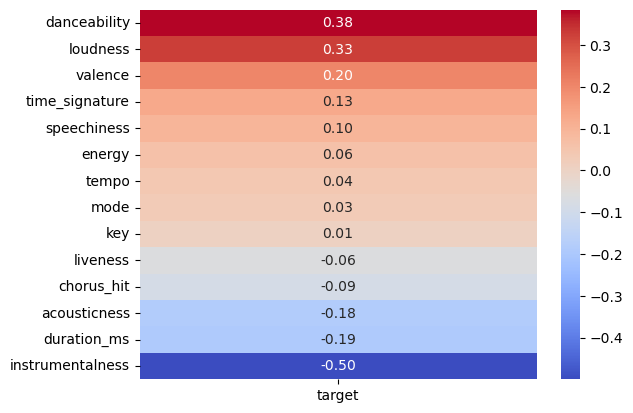

   danceability  energy  loudness  speechiness  acousticness  \
0         0.741   0.626    -4.826       0.0886       0.02000   
1         0.447   0.247   -14.661       0.0346       0.87100   
2         0.550   0.415    -6.557       0.0520       0.16100   
3         0.502   0.648    -5.698       0.0527       0.00513   
4         0.807   0.887    -3.892       0.2750       0.00381   

   instrumentalness  liveness  valence  duration_ms  time_signature  \
0             0.000    0.0828    0.706       188493               4   
1             0.814    0.0946    0.250       176880               3   
2             0.000    0.1080    0.274       205463               4   
3             0.000    0.2040    0.291       193043               4   
4             0.000    0.3910    0.780       144244               4   

   chorus_hit  target  
0    41.18681       1  
1    33.18083       0  
2    44.89147       1  
3    29.52521       0  
4    24.99199       1  


In [8]:
# Correlation matrix
print(dataset.corr())

# Data Visualization
import seaborn as sns
corr = dataset.corr().sort_values(by='target', ascending=False)
print(corr['target'])
sns.heatmap(corr['target'].drop('target').to_frame(), cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

# Drop weak correlated columns
dataset.drop(['tempo', 'mode', 'key'], axis=1, inplace=True)
print(dataset.head())

In [9]:
# Split dataset into independent & dependent variables
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print(x, '\n\n')
print(y, '\n\n')

[[ 7.410000e-01  6.260000e-01 -4.826000e+00 ...  1.884930e+05
   4.000000e+00  4.118681e+01]
 [ 4.470000e-01  2.470000e-01 -1.466100e+01 ...  1.768800e+05
   3.000000e+00  3.318083e+01]
 [ 5.500000e-01  4.150000e-01 -6.557000e+00 ...  2.054630e+05
   4.000000e+00  4.489147e+01]
 ...
 [ 7.190000e-01  8.040000e-01 -4.581000e+00 ...  2.277600e+05
   4.000000e+00  2.073371e+01]
 [ 6.000000e-01  1.770000e-01 -1.607000e+01 ...  2.133870e+05
   4.000000e+00  2.165301e+01]
 [ 1.210000e-01  1.230000e-01 -2.302500e+01 ...  3.413960e+05
   4.000000e+00  7.105343e+01]] 


[1 0 1 ... 1 0 0] 




In [10]:
# Split dataset into training & test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print(x_train, '\n\n')
print(x_test, '\n\n')
print(y_train, '\n\n')
print(y_test, '\n\n')

[[ 5.980000e-01  5.120000e-01 -7.717000e+00 ...  1.849730e+05
   4.000000e+00  2.505959e+01]
 [ 4.050000e-01  3.710000e-01 -7.187000e+00 ...  2.041730e+05
   4.000000e+00  5.919716e+01]
 [ 5.730000e-01  9.230000e-01 -5.509000e+00 ...  3.503070e+05
   3.000000e+00  4.765464e+01]
 ...
 [ 4.970000e-01  8.050000e-01 -3.995000e+00 ...  1.918270e+05
   4.000000e+00  4.038049e+01]
 [ 6.160000e-01  4.740000e-01 -9.608000e+00 ...  2.101330e+05
   4.000000e+00  2.382185e+01]
 [ 5.110000e-01  7.340000e-01 -6.025000e+00 ...  2.761600e+05
   5.000000e+00  2.968708e+01]] 


[[ 5.680000e-01  5.170000e-01 -1.065100e+01 ...  2.518530e+05
   4.000000e+00  3.579782e+01]
 [ 6.760000e-01  6.150000e-01 -7.534000e+00 ...  1.766750e+05
   4.000000e+00  3.410738e+01]
 [ 4.890000e-01  9.350000e-01 -1.358200e+01 ...  4.350000e+05
   4.000000e+00  3.710120e+01]
 ...
 [ 3.210000e-01  1.000000e-01 -2.157500e+01 ...  2.173820e+05
   4.000000e+00  4.342380e+01]
 [ 8.330000e-01  6.380000e-01 -9.119000e+00 ...  2.15987

In [11]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

print(x_train, '\n\n')
print(x_test, '\n\n')

[[ 0.15219959 -0.63561151 -0.02027313 ... -0.60332095  0.17925716
  -0.81208105]
 [-0.85922732 -1.21964233  0.08060052 ... -0.38110552  0.17925716
   0.90967085]
 [ 0.02118574  1.06677618  0.3999703  ...  1.31020855 -2.47998385
   0.32751589]
 ...
 [-0.37709636  0.5780128   0.68812635 ... -0.52399467  0.17925716
  -0.03936089]
 [ 0.24652956 -0.79300989 -0.3801827  ... -0.31212614  0.17925716
  -0.87450732]
 [-0.3037286   0.28392636  0.30176124 ...  0.4520519   2.83849817
  -0.5786904 ]] 


[[-5.01702659e-03 -6.14901200e-01 -5.78694428e-01 ...  1.70729475e-01
   1.79257160e-01 -2.70491009e-01]
 [ 5.60962797e-01 -2.08979074e-01  1.45568292e-02 ... -6.99359680e-01
   1.79257160e-01 -3.55749517e-01]
 [-4.19020787e-01  1.11648093e+00 -1.13654474e+00 ...  2.29042165e+00
   1.79257160e-01 -2.04754140e-01]
 ...
 [-1.29943385e+00 -2.34214126e+00 -2.65783358e+00 ... -2.28228242e-01
   1.79257160e-01  1.14130553e-01]
 [ 1.38372976e+00 -1.13711637e-01 -2.87112482e-01 ... -2.44373582e-01
   1.79257

In [12]:
# Fitting SVM classifier to the training set
from sklearn.svm import SVC
classifierSVM = SVC(kernel='linear', random_state=0)
classifierSVM.fit(x_train, y_train)

# Fitting Random Forest classifier to the training set
from sklearn.ensemble import RandomForestClassifier
classifierRF = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=0)
classifierRF.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

In [13]:
# Predict test set results
y_predSVM = classifierSVM.predict(x_test)
y_predRF = classifierRF.predict(x_test)
print(y_predSVM, '\n\n')
print(y_predRF, '\n\n')

[1 1 0 ... 0 1 1] 


[1 1 0 ... 0 1 1] 




[[441 174]
 [ 62 603]] 




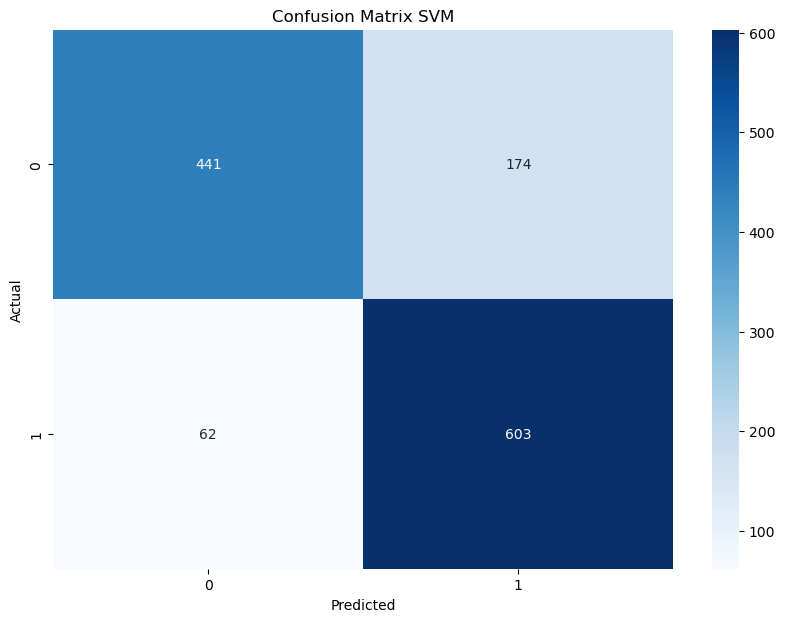

[[494 121]
 [ 81 584]] 




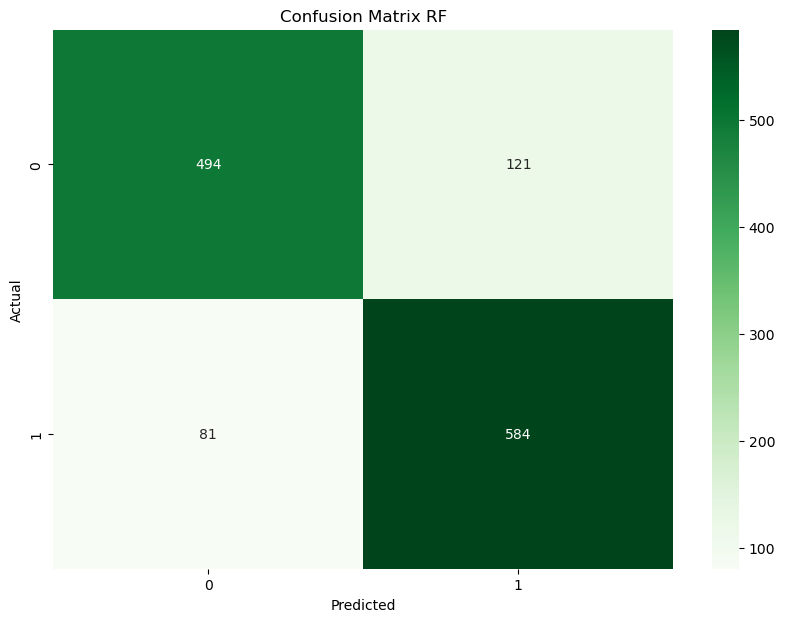

In [14]:
# Confusion Matrix for SVM
from sklearn.metrics import confusion_matrix
cmSVM = confusion_matrix(y_test, y_predSVM)
print(cmSVM, '\n\n')

# Plot Confusion Matrix for SVM
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(cmSVM, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVM')
plt.show()

# Confusion Matrix for RF
from sklearn.metrics import confusion_matrix
cmRF = confusion_matrix(y_test, y_predRF)
print(cmRF, '\n\n')

# Plot Confusion Matrix for RF
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(cmRF, annot=True, cmap='Greens', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix RF')
plt.show()

In [15]:
# Precision score, recall score, f-score and accuracy score for SVM
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Support Vector Machine Classifier')
print('Precision Score: ', precision_score(y_test, y_predSVM, average='weighted'))
print('Recall Score: ', recall_score(y_test, y_predSVM, average='weighted'))
print('F1 Score: ', f1_score(y_test, y_predSVM, average='weighted'))
print('Accuracy Score: ', accuracy_score(y_test, y_predSVM), '\n\n')

# Precision score, recall score, f-score and accuracy score for RF
print('Random Forest Classifier')
print('Precision Score: ', precision_score(y_test, y_predRF, average='weighted'))
print('Recall Score: ', recall_score(y_test, y_predRF, average='weighted'))
print('F1 Score: ', f1_score(y_test, y_predRF, average='weighted'))
print('Accuracy Score: ', accuracy_score(y_test, y_predRF))

Support Vector Machine Classifier
Precision Score:  0.824434306324217
Recall Score:  0.815625
F1 Score:  0.813549952672074
Accuracy Score:  0.815625 


Random Forest Classifier
Precision Score:  0.8431488012642614
Recall Score:  0.8421875
F1 Score:  0.8418390211924185
Accuracy Score:  0.8421875


In [16]:
# In conclusion, Random Forest Classifier shows the highest accuracy score compare to SVM Classifier.
# Thus, Random Forest Classifier is the best model for this dataset.
# Random forest classifier model saved to pickle file
import pickle
pickle.dump(classifierRF, open('spotify_rf.pkl', 'wb'))